<a href="https://colab.research.google.com/github/KeSellers/BuildingLikeKalli/blob/main/GeneralPlanThoughts_Unstructured.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get VGG-19

<h1>Thoughts</h1>
<ul>
  <li> algorithm to detect, fence, balcony etc so the algorithm only combines features in the relevant area</li>
  <li>
      first of all i have to get testdata for recognizing the relevant part
  </li>
  <li>
      due to lack of data i should pretrain with a random metal blacksmith design
  </li>

</ul>

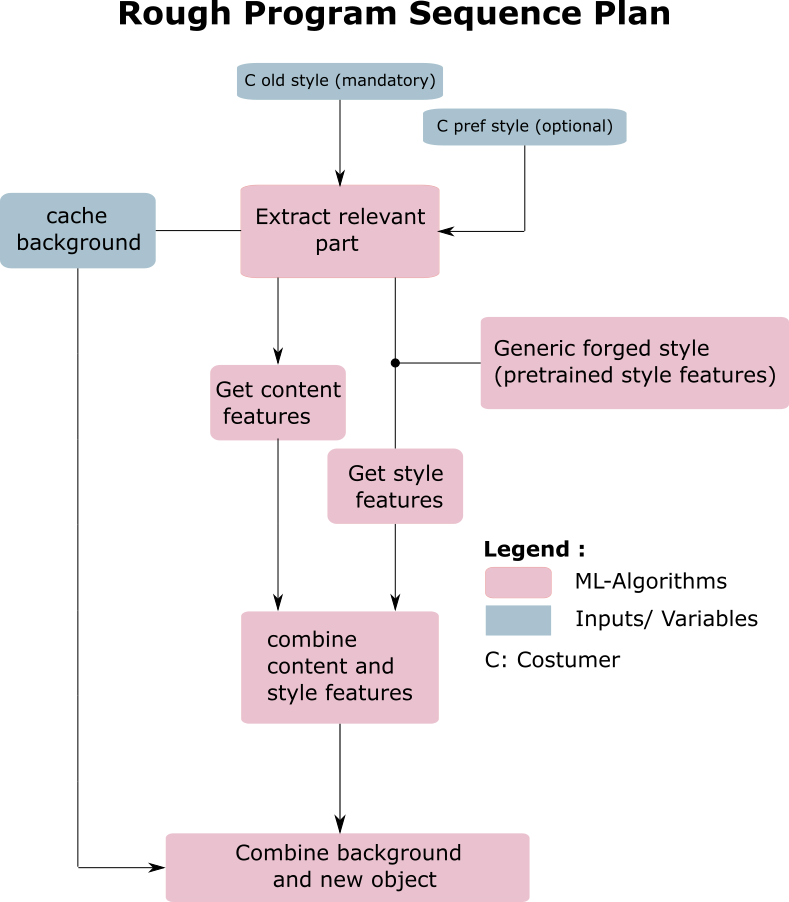

In [1]:
import tensorflow as tf

<h2> Illustration of the VGG-19 Arcitecture</h2>
<a href="https://www.researchgate.net/figure/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means_fig2_325137356"><img src="https://www.researchgate.net/profile/Clifford-Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg" alt="Illustration of the network architecture of VGG-19 model: conv means convolution, FC means fully connected"/></a>

In [2]:
s_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

c_layers = ['block5_conv2']

def get_model():
  vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  style_layers = [vgg.get_layer(name).output for name in s_layers]
  content_layers = [vgg.get_layer(name).output for name in c_layers]

  model_layers = style_layers + content_layers

  model = models.Model(vgg.input, model_layers)

  return model

<h2> Feature Differentiation </h2>
content features -> features of old fence <br>
style features   -> features of a forged fence

In [ ]:
def get_content_features(content, model):
  content_output = model(content)
  content_features = [layer[0] for layer in content_output[len(s_layers):]]
  return content_features

def get_style_features(style, model):
  style_output = model(style)
  style_features = [layer[0] for layer in style_output[:len(s_layers)]]
  return style_features